# WEEK 6

## Task 1: input (fuzzification) –rules evaluation

1.	Required libraries:

In [3]:
import numpy as np
import skfuzzy as fuz
import matplotlib.pyplot as plt 

2.	Define inputs and output of the system (universal variables and the range of each variable)

- inputs: weatherCondition, rain 
- output: water


In [13]:
#universe variables
weatherCondition = np.arange(0, 50, 1)
rain = np.arange(0,10,1)
water = np.arange(0,10,1)
plant = np.arange(0,10,1)

3.	Create the membership function.  Following membership functions are based on 3 linguistic variables:
- WeatherCondition: Cool, Ambient and hot
- Rain: low, average and high
- Water: low, average and high
- Membership function Shape: Trapezoidal 


In [36]:
wc_cool = fuz.trapmf(weatherCondition, [0,0, 15, 20])
wc_ambient = fuz.trapmf(weatherCondition, [15, 25, 35, 35])
wc_hot = fuz.trapmf(weatherCondition, [30, 40, 50, 50])

rain_low = fuz.trapmf(rain, [0, 0, 2, 5])
rain_average = fuz.trapmf(rain, [0, 2, 5, 7])
rain_high = fuz.trapmf(rain, [5, 7, 10, 10])

w_low = fuz.trapmf(water, [0, 0, 2, 5])
w_average = fuz.trapmf(water, [0, 2, 5, 7])
w_high = fuz.trapmf(water, [5, 7, 10, 10])

indoor_plant = fuz.trapmf(plant, [0, 0, 4, 6])
outdoor_plant = fuz.trapmf(plant, [4, 6, 10, 10])

4.	Plot the graph

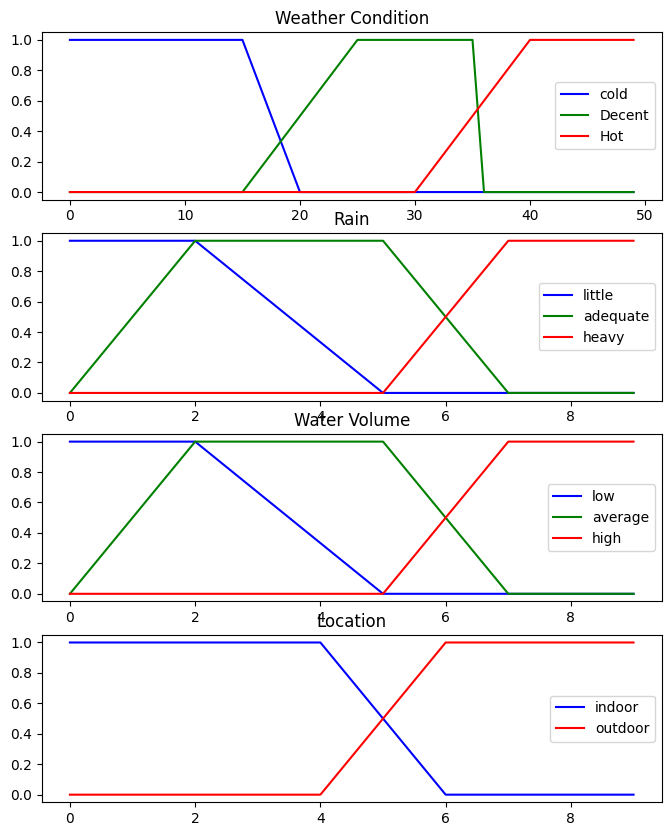

In [39]:
fig, (ax, ax1, ax2, ax3) = plt.subplots(nrows=4,  figsize=(8, 10))

ax.plot(weatherCondition, wc_cool, 'b', linewidth=1.5, label='cold')
ax.plot(weatherCondition, wc_ambient, 'g', linewidth=1.5, label='Decent')
ax.plot(weatherCondition, wc_hot, 'r', linewidth=1.5, label='Hot')
ax.set_title('Weather Condition')
ax.legend()

ax1.plot(rain, rain_low, 'b', linewidth=1.5, label='little')
ax1.plot(rain, rain_average, 'g', linewidth=1.5, label='adequate')
ax1.plot(rain, rain_high, 'r', linewidth=1.5, label='heavy')
ax1.set_title('Rain')
ax1.legend()

ax2.plot(water, w_low, 'b', linewidth=1.5, label='low')
ax2.plot(water, w_average, 'g', linewidth=1.5, label='average')
ax2.plot(water, w_high, 'r', linewidth=1.5, label='high')
ax2.set_title('Water Volume')
ax2.legend()

ax3.plot(plant, indoor_plant, 'b', linewidth=1.5, label='indoor')
ax3.plot(plant, outdoor_plant, 'r', linewidth=1.5, label='outdoor')
ax3.set_title('Location')
ax3.legend()

6.	Fuzzify the user input

In [41]:
# input temp
temperature = 24
fz_wc_cold = fuz.interp_membership(weatherCondition, wc_cool, temperature)
fz_wc_ambient = fuz.interp_membership(weatherCondition, wc_ambient,temperature)
fz_wc_hot = fuz.interp_membership(weatherCondition, wc_hot, temperature)
print(f'Fuzzy values for weatherCondition \nCold : {fz_wc_cold}\nAmbient : {fz_wc_ambient}\nHot : {fz_wc_hot}')

#input rain
rainlevel = 6
fz_rain_low = fuz.interp_membership(rain, rain_low, rainlevel)
fz_rain_avg = fuz.interp_membership(rain, rain_average,rainlevel)
fz_rain_high = fuz.interp_membership(rain, rain_high, rainlevel)
print(f'Fuzzy values for rainfall \nLow : {fz_rain_low}\nAverage : {fz_rain_avg}\nHigh : {fz_rain_high}')

#input location
location = 5.5
fz_indoor_plant = fuz.interp_membership(plant, indoor_plant, location)
fz_outdoor_plant = fuz.interp_membership(plant, outdoor_plant, location)
print(f'Fuzzy values for rainfall \nIndoor : {fz_indoor_plant}\nOutdoor : {fz_outdoor_plant}')

Fuzzy values for weatherCondition 
Cold : 0.0
Ambient : 0.9
Hot : 0.0
Fuzzy values for rainfall 
Low : 0.0
Average : 0.5
High : 0.5
Fuzzy values for rainfall 
Indoor : 0.25
Outdoor : 0.75


7.	Define, create and evaluate the rules. Only 3 rules created for this example.

In [8]:
#creating and evaluating rules
#R1: if weatherCondition is cold OR lots of rain then water dispense should be low
rule1 = np.fmax(fz_wc_cold, fz_rain_high)
fz_water_evaluation1 = np.fmin(rule1, w_low)   #clipping using np.fmin.
print('Rule 1:'+str(rule1)+'\t Required Water: =>'+str(fz_water_evaluation1))

#R2: if weatherCondition is ambient OR adequate rain then water dispense should be average
rule2 = np.fmax(fz_wc_ambient, fz_rain_avg)
fz_water_evaluation2 = np.fmin(rule2, w_average)
print('Rule 2:'+str(rule2)+'\tRequired Water: =>'+str(fz_water_evaluation2))

#R3: if weatherCondition is hot OR less rain then water dispense should be high
rule3 = np.fmax(fz_wc_hot, fz_rain_low)
fz_water_evaluation3 = np.fmin(rule3, w_high) 
print('Rule 3:'+str(rule3)+'\tRequired Water: =>'+str(fz_water_evaluation3))

Rule 1:0.5	 Required Water: =>[0.5        0.5        0.5        0.5        0.33333333 0.
 0.         0.         0.         0.        ]
Rule 2:0.9	Required Water: =>[0.  0.5 0.9 0.9 0.9 0.9 0.5 0.  0.  0. ]
Rule 3:0.0	Required Water: =>[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


8.	When you run the program, you should see the following outputs.

9.	Plot the membership function for water level (evaluation results).  Normal plotting for membership function (water) and fill up the area (met the rules criteria) 

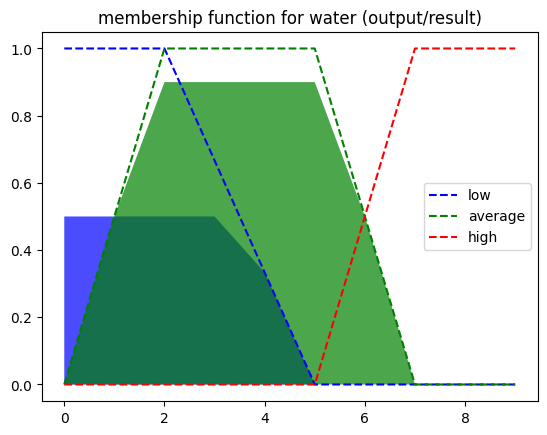

In [9]:
#for drawing zero line at the bottom.
no_water = np.zeros_like(water)

# Visualize the output membership function 
fig, ax = plt.subplots()
ax.plot(water, w_low, 'b', linewidth=1.5, linestyle='--', label='low')

#fill the area up with color , the zero line (y=0) for the bottom, clipping result, color
ax.fill_between(water, no_water, fz_water_evaluation1, facecolor='b', alpha=0.7)

ax.plot(water, w_average, 'g', linewidth=1.5, linestyle='--', label='average')
ax.fill_between(water, no_water, fz_water_evaluation2, facecolor='g', alpha=0.7)

ax.plot(water, w_high, 'r', linewidth=1.5, linestyle='--', label='high')
ax.fill_between(water, no_water, fz_water_evaluation3, facecolor='r', alpha=0.7)

ax.set_title('membership function for water (output/result)')
ax.legend()
plt.show()

10.	Alternative: Plot the clip area of the membership function for water level (evaluation results) only.

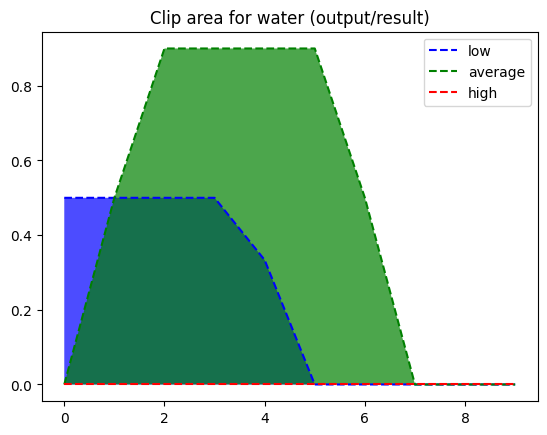

In [15]:
fig, ax = plt.subplots()

ax.plot(water, fz_water_evaluation1, 'b', linewidth=1.5, linestyle='--', label='low')
ax.fill_between(water, no_water, fz_water_evaluation1, facecolor='b', alpha=0.7)

ax.plot(water, fz_water_evaluation2, 'g', linewidth=1.5, linestyle='--', label='average')
ax.fill_between(water, no_water, fz_water_evaluation2, facecolor='g', alpha=0.7)

ax.plot(water, fz_water_evaluation3, 'r', linewidth=1.5, linestyle='--', label='high')
ax.fill_between(water, no_water, fz_water_evaluation3, facecolor='r', alpha=0.7)

ax.set_title('Clip area for water (output/result)')
ax.legend()

plt.show()

## Task 2: Aggregation and defuzzification

1.	Aggregate all the evaluation values for each rule.  Get the max value. 

In [42]:
# Aggregate output membership functions
aggregateValue = np.fmax(fz_water_evaluation1,
                    np.fmax(fz_water_evaluation2, fz_water_evaluation3))

print("Aggregate values : ", str(aggregateValue))

Aggregate values :  [0.5 0.5 0.9 0.9 0.9 0.9 0.5 0.  0.  0. ]


2.	Perform defuzzification using centroid method to get the crisp value.

In [11]:
waterAmount = fuz.defuzz(water, aggregateValue, 'centroid') 
print("Crisp value for the water dispense: ", str(waterAmount))

Crisp value for the water dispense:  3.3367697594501715


3.	Visualize the membership function for the required amount of water (crisp value)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


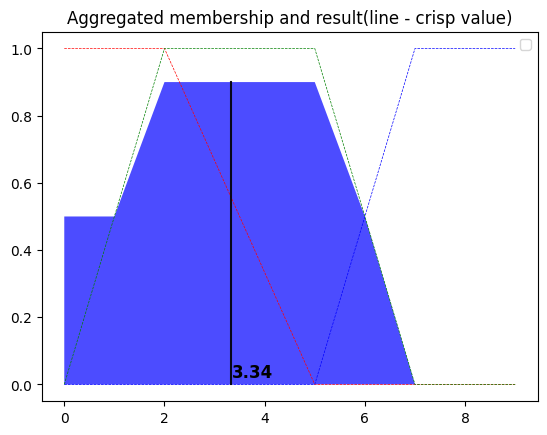

In [12]:
fz_water = fuz.interp_membership(water, aggregateValue, waterAmount)  # for plot

# Visualize clothes membership function with crisp value
fig, ax = plt.subplots()

ax.plot(water, w_low, 'r', linewidth=0.5, linestyle='--', )
ax.plot(water, w_average, 'g', linewidth=0.5, linestyle='--')
ax.plot(water, w_high, 'b', linewidth=0.5, linestyle='--')
ax.text(waterAmount, 0.01, "{:.2f}".format(waterAmount),
        verticalalignment='bottom', 
        color='black', fontsize=12, weight='bold')
ax.fill_between(water, no_water, aggregateValue, facecolor='blue', alpha=0.7)
ax.plot([waterAmount, waterAmount], [0, fz_water], 'k', linewidth=1.5, alpha=0.9)

ax.set_title('Aggregated membership and result(line - crisp value)')
ax.legend()

plt.show()

4.	When you run the program, you should see the following output.

## Task 3: Using Simpful package to perform the above task

1.	Import library

In [44]:
from simpful import *

2.	Create fuzzy system object

In [45]:
# Create a fuzzy system object
FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.8.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



3.	Create Trapezoidal membership functions

In [23]:
#mamdani Model
# Define fuzzy sets and linguistic variables
wc_cool = FuzzySet(function=Trapezoidal_MF(0, 0, 15, 20), term="cold")
wc_ambient = FuzzySet(function=Trapezoidal_MF(15, 25, 35, 35), term="ambient")
wc_hot = FuzzySet(function=Trapezoidal_MF(30, 40, 50, 50), term="hot")
FS.add_linguistic_variable("weather", LinguisticVariable([wc_cool, wc_ambient, wc_hot], concept="Weather Condition",universe_of_discourse=[0,50]))

rain_low = FuzzySet(function=Trapezoidal_MF(0, 0, 2, 5), term="low")
rain_average = FuzzySet(function=Trapezoidal_MF(0, 2, 5, 7), term="average")
rain_high = FuzzySet(function=Trapezoidal_MF(5, 7, 10, 10), term="high")
FS.add_linguistic_variable("rain", LinguisticVariable([rain_low, rain_average, rain_high], concept="Rainfall",universe_of_discourse=[0,10]))

# Define output fuzzy sets and linguistic variable
water_low = FuzzySet(function=Trapezoidal_MF(0, 0, 2, 5), term="low")
water_average = FuzzySet(function=Trapezoidal_MF(0, 2, 5, 7), term="average")
water_high = FuzzySet(function=Trapezoidal_MF(5, 7, 10, 10), term="high")
FS.add_linguistic_variable("water", LinguisticVariable([water_low, water_average, water_high], concept="water Dispense",universe_of_discourse=[0,10]))


4.	Define the rules 

In [24]:
R1 = "IF (weather IS cold) OR (rain IS high) THEN (water IS low) WEIGHT 0.5"
R2 = "IF (weather IS ambient) OR (rain IS average) THEN (water IS average) WEIGHT 0.8"
R3 = "IF (weather IS hot) OR (rain IS low) THEN (water IS high) WEIGHT 1.0"
FS.add_rules([R1, R2, R3])

5.	Insert the crisp value (inputs)

In [26]:
# Set antecedents values
FS.set_variable("weather", 24)
FS.set_variable("rain", 6)

6.	Perform the inference (rule evaluation and printout the final result.

In [27]:
print(FS.Mamdani_inference(["water"]))

{'water': 3.337724211950254}
